# EDA: Consolas de video juegos

- Data source: https://www.kaggle.com/datasets/lucasgalanti/home-consoles-and-gaming-sales/data

En este notebook se analiza el dataset _console_data_ que contiene datos de las consolas de video juegos lanzadas desde sus inicios en 1972.

Atravéz de este pequeño proyecto de análisis exploratorio de datos se busca responder a las siguientes preguntas:

1. ¿Compañías con más consolas lanzadas?
2. ¿Compañías con más consolas vendidas?
3. ¿Cuales fueron los años donde se lanzaron más y menos consolas?
4. ¿Mayores competidores en consolas de ultima generación?

**Descripción de las columnas del dataset**:

- Console Name: Nombre de la consola.
- Type: "Home" por default en este dataset para todas las observaciones.
- Company: Nombre de la compañía responsable del lanzamiento de la consola. 
- Gen: Generación a la que pertenece consola.
- Gen Years: Periodo (en años) de la generación a la que pertenece la consola.
- Release Year/Discontinuation Year: Periodo de ventas de la consola.
- Units Sold (million): Total de unidades vendidas (en millones) por consola.
- Remarks: Información adicional de la consola.

## Conociendo los datos

**Librerías**

In [2]:
import janitor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("..")

import modules.utils.paths as path

In [5]:
%run pandas-missing-extension.ipynb

**Carga de datos**

In [6]:
file_path = path.data_raw_dir("Console_Data.csv")
console_df = pd.read_csv(file_path)
console_df.head()

,Console Name,Type,Company,Gen,Gen Years,Released Year,Generation,Discontinuation Year,Units sold (million),Remarks,Link to gif
0,Magnavox Odyssey,Home,Magnavox,1st Gen,1972-1978,1972,1,1975,0.35,The Magnavox Odyssey is the first commercial ...,https://s12.gifyu.com/images/SVLO3.gif
1,Home Pong,Home,Atari,1st Gen,1972-1978,1975,1,1978,0.15,Atari's Home Pong was a dedicated console that...,https://s12.gifyu.com/images/SVz99.gif
2,Atari 2600,Home,Atari,2nd Gen,1978-1982,1977,2,1992,30.00,Atari2600 is often credited with popularizing ...,https://s12.gifyu.com/images/SVz3U.gif
3,Magnavox Odyssey 2,Home,Magnavox,2nd Gen,1978-1982,1978,2,1984,2.00,The Odyssey² featured a built-in keyboard for ...,https://s12.gifyu.com/images/SVz70.gif
4,Intellivision,Home,Mattel,2nd Gen,1978-1982,1979,2,1990,3.00,The Intellivision boasted superior graphics an...,https://s12.gifyu.com/images/SVLBF.gif


Estandarización del nombre de variables a `snakecase` y descartar las ultimas dos columnas del dataset.

In [7]:
console_df = (
  console_df.iloc[:, :-2]
  .clean_names(case_type="snake")
)

In [8]:
(
  console_df
  .dtypes
  .value_counts()
)

object     6
int64      2
float64    1
dtype: int64

In [9]:
print(f"Observaciones: {console_df.shape[0]}")
print(f"Variables: {console_df.shape[1]}")
print(f"Total de elementos: {console_df.size}")
print(f"Total de valores faltantes: {console_df.missing.number_missing()}")
print(f"Total de valores completos: {console_df.missing.number_complete()}")
print()
console_df.info()

Observaciones: 26
Variables: 9
Total de elementos: 234
Total de valores faltantes: 0
Total de valores completos: 234

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   console_name          26 non-null     object 
 1   type                  26 non-null     object 
 2   company               26 non-null     object 
 3   gen                   26 non-null     object 
 4   gen_years             26 non-null     object 
 5   released_year         26 non-null     int64  
 6   generation            26 non-null     int64  
 7   discontinuation_year  26 non-null     object 
 8   units_sold_million_   26 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 2.0+ KB


## Análisis 

### **1. ¿Compañías con más consolas lanzadas?**

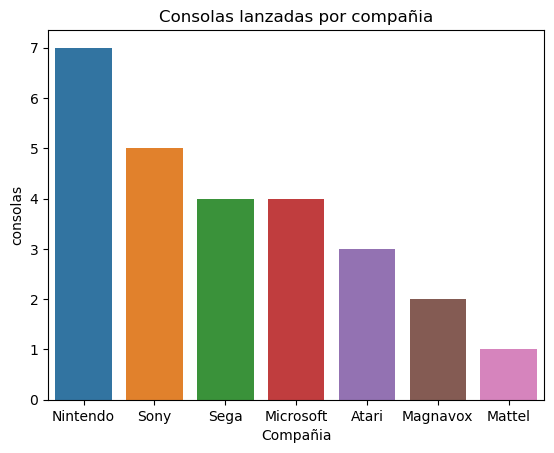

Nintendo es la compañía con más consolas lanzadas,
por encima de sus principales competidores Sony, Sega, Microsoft.


In [10]:
released_consoles =  (
  console_df.company
  .value_counts(sort=True)
  .reset_index(name="consolas")
)

sns.barplot(
  x=released_consoles["index"],
  y=released_consoles["consolas"]
).set(
  title = "Consolas lanzadas por compañia",
  xlabel="Compañia"
)
plt.show()

highest = (released_consoles.loc[0:0, "index"])[0]
competitors = released_consoles.iloc[1:4, 0:1].apply(", ".join)[0]

print(
  f"{highest} es la compañía con más consolas lanzadas,",
  f"por encima de sus principales competidores {competitors}.",
  sep="\n"
)


Comparar a las compañías por consolas lanzadas puedes ser un poco trivial, pues si damos un vistazo a la historia de las 4 principales competidores que se nos muestran en gráfico  (Nintendo, Sony, Sega y Microsoft) Nintendo lleva una ventaja significativa sobre Sony y Microsoft pues lleva más años en el mercado de las consolas, en cuanto a Sega, ésta tiene ya muchos años que salió del mercado y por ende su producción de consolas de video juegos paró.

El siguiente gráfico ayuda a comprobarlo:

company
Nintendo     1983
Sega         1986
Sony         1994
Microsoft    2001
Name: released_year, dtype: int64

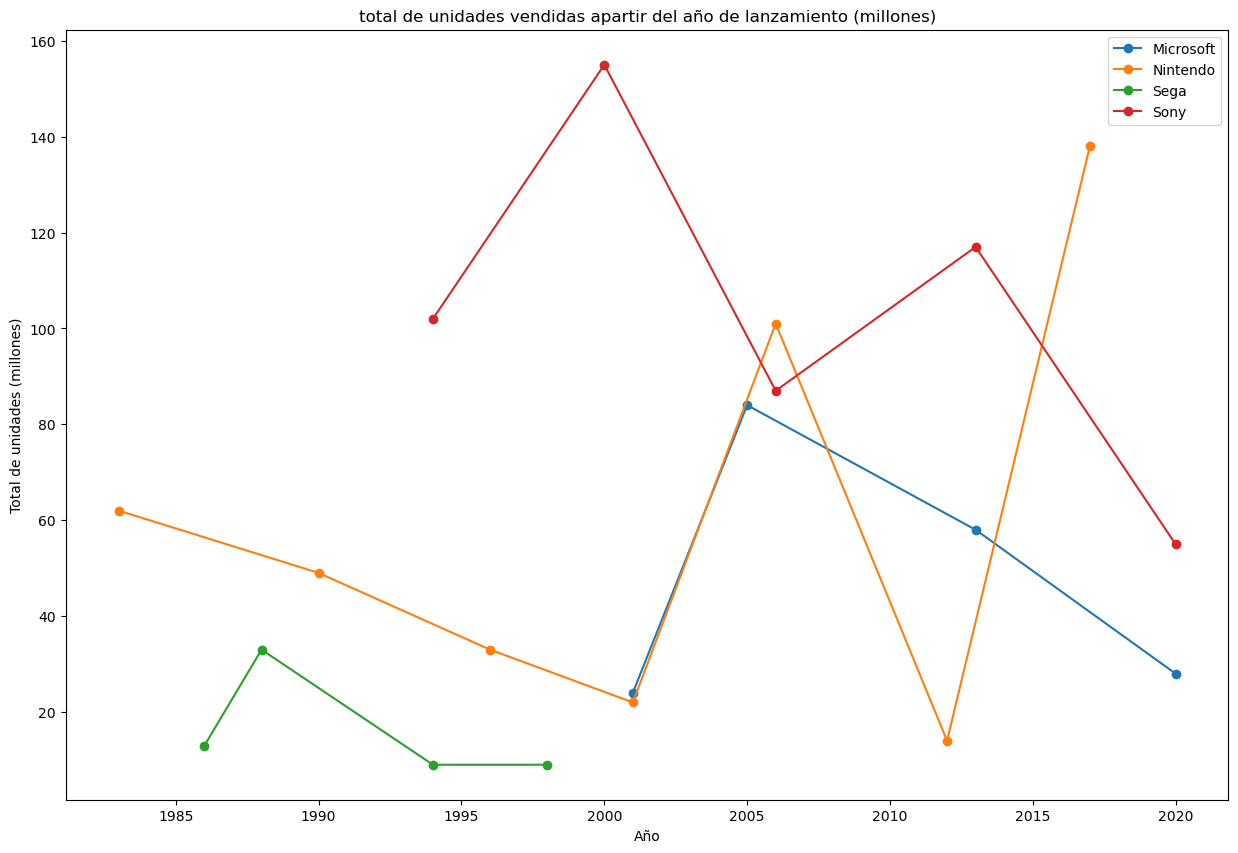

In [11]:
# Nos quedamos solo con los datos de las primeras 4 compañias con más consolas lanzadas.
top_console_companies = console_df[(console_df["company"]=="Nintendo") | (console_df["company"]=="Sony")| (console_df["company"]=="Sega") | (console_df["company"]=="Microsoft")]

top_console_companies = top_console_companies.sort_values(by="released_year", ascending=True)
top_console_companies = top_console_companies.groupby(["company", "released_year"])["units_sold_million_"].sum().reset_index()

companies = list(top_console_companies["company"].unique())

plt.figure(figsize=(15,10))
for company_name in companies:
  data = top_console_companies[top_console_companies["company"] == company_name]
  plt.plot(
    data["released_year"],
    data["units_sold_million_"],
    marker="o",
    label=company_name
  )

plt.xlabel("Año")
plt.ylabel("Total de unidades (millones)")
plt.title("total de unidades vendidas apartir del año de lanzamiento (millones)")
plt.legend()

top_console_companies.groupby(["company"])["released_year"].min().sort_values()


Con él gráfico de arriba podemos observar:
1. Los años de lanzamiento de las consolas lanzadas por cada compañía.
2. Las ventas de las consolas a partir del año de lanzamiento.
3. El último año en que una compañía lanzo una consola.


Si bien, podemos ver como _Nintendo_ es la compañía más longeva al surgir en 1983 (11 años antes que _Sony_ y 18 antes que _Microsoft_), fue durante sus primeros años cuando el periodo donde ésta compañía desarrolló el mayor número de consolas sacadas al mercado dándole cierta ventaja en el número total de dichos dispositivos.

**Bonus**
Al tomar el año de lanzamiento de las consolas como referencia, se observa como _Sony_ empezó su carrera en el mundo de los video juegos con ventas superiores a las de _Nintendo_ en sus inicios, sin embargo no podemos decir lo mismo al comparar las ventas de estas compañías en sus últimas consolas lanzadas, que si bien Sony empezó a lo grande, no le fue también cuando su principal competidor lanzó al mercado la consola "Wii" y posteriormente la más famosa de estos tiempos la "nintendo switch" que arrasó al "Play tation 4" y su sucesor la "PlayStation 5". En cuanto a Microsoft no podemos negar que sus consolas Xbox no fueron tan exitosas.


Pero... **¿Cómo ven las ventas de de consolas de estas compañías respecto al año en que éstas se descontinuaron?**

/home/pahoalapizco/anaconda3/envs/eda_personal_projects/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/pahoalapizco/anaconda3/envs/eda_personal_projects/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


company
Sega         2001
Microsoft    2024
Nintendo     2024
Sony         2024
Name: discontinuation_year, dtype: int64

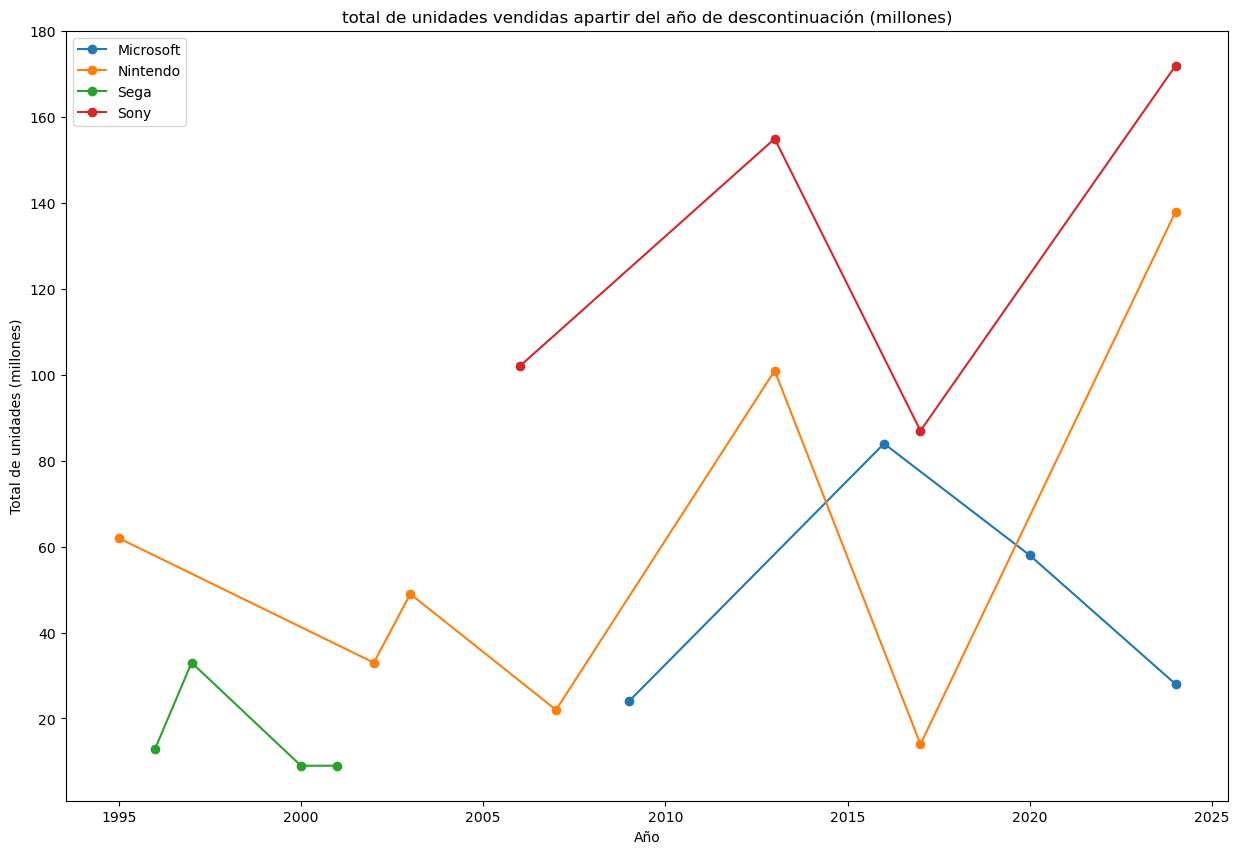

In [12]:
# Nos quedamos solo con los datos de las primeras 4 compañias con más consolas lanzadas.
top_console_companies = console_df[(console_df["company"]=="Nintendo") | (console_df["company"]=="Sony")| (console_df["company"]=="Sega") | (console_df["company"]=="Microsoft")]

top_console_companies["discontinuation_year"].replace("ongoing", 2024, inplace=True)
top_console_companies["discontinuation_year"] = pd.to_numeric(top_console_companies["discontinuation_year"])
top_console_companies = top_console_companies.sort_values(by="discontinuation_year", ascending=True)
top_console_companies = top_console_companies.groupby(["company", "discontinuation_year"])["units_sold_million_"].sum().reset_index()

companies = list(top_console_companies["company"].unique())

plt.figure(figsize=(15,10))
for company_name in companies:
  data = top_console_companies[top_console_companies["company"] == company_name]
  plt.plot(
    data["discontinuation_year"],
    data["units_sold_million_"],
    marker="o",
    label=company_name
  )

plt.xlabel("Año")
plt.ylabel("Total de unidades (millones)")
plt.title("total de unidades vendidas apartir del año de descontinuación (millones)")
plt.legend()

top_console_companies.groupby(["company"])["discontinuation_year"].max().sort_values()

Al ver la información a partir del año de descontinuación(`discontinuation_year`) el panorama cambia completamente, ahora vemos como la consola de Sony la "PlayStation 5" supera en ventas a la "nintendo switch". En cuanto a las otras compañías (Microsoft y Sega) siguen el mismo patrón de ventas que en el gráfico anterior donde utilizamos el año de lanzamiento.

### **2. ¿Compañías con más consolas vendidas?**

Sony es la compañía con más consolas vendidas, con un total de 516.0 millones de unidades.


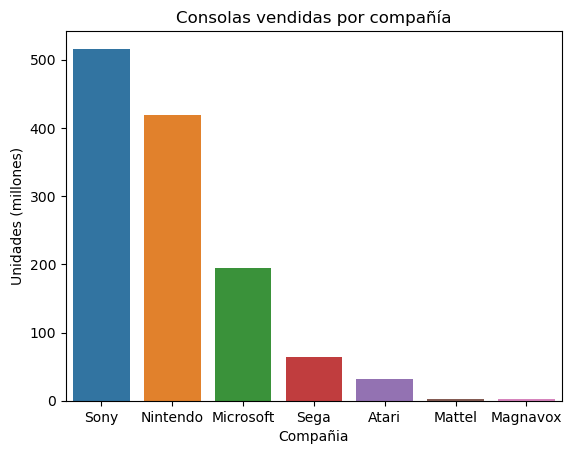

In [13]:
sold_consoles_df = (
  console_df
  .groupby(["company"])["units_sold_million_"]
  .sum()
  .sort_values(ascending=False)
  .reset_index(name="units_sold")
)

sns.barplot(
    x=sold_consoles_df["company"],
    y=sold_consoles_df["units_sold"]
  ).set(
    title = "Consolas vendidas por compañía",
    xlabel="Compañia",
    ylabel="Unidades (millones)"
  )

print((sold_consoles_df.loc[0:0, "company"])[0], "es la compañía con más consolas vendidas, con un total de",
      (sold_consoles_df.loc[0:0, "units_sold"])[0], "millones de unidades."
)


plt.show()

**2.1 Cuales fueron las consolas más vendidas?**

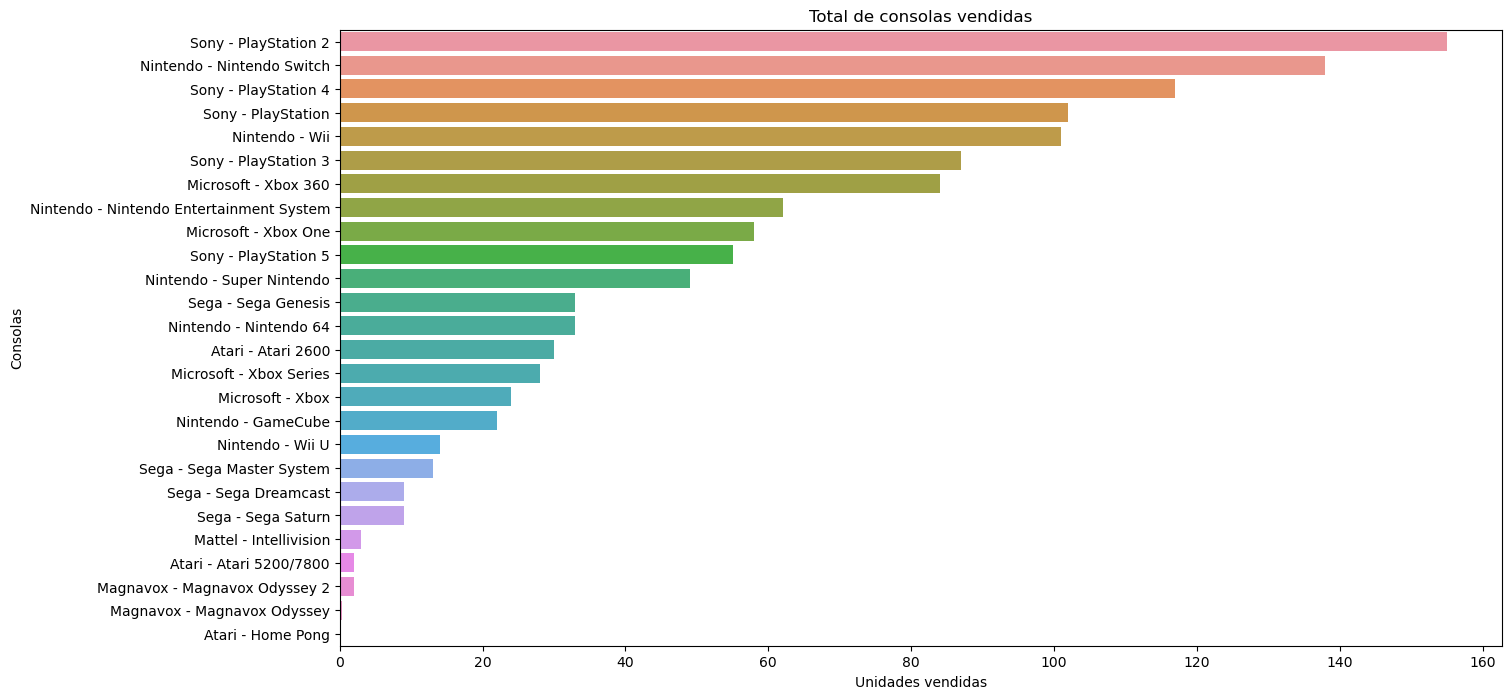

In [14]:
plt.figure(figsize=(15,8))
(
  console_df
  .assign(
    console_company = lambda df: df["company"] + " - " + df["console_name"]
  )
  .sort_values(by="units_sold_million_", ascending=False)
  .pipe(
    lambda df: (
      sns.barplot(
        y=df["console_company"],
        x=df["units_sold_million_"]
      )
      .set(
        title="Total de consolas vendidas",
        ylabel="Consolas",
        xlabel="Unidades vendidas"
      )
    )
  )
)

plt.show()

La "PlayStation 2" de _Sony_ es la consola con mayores ventas sobre la "nintendo Switch" de _Nintendo_, a pesar de se una consola descontinuada desde hace ya varios años sigue llevando una ventaja significativa en ventas y popularidad entre los amantes de los video juegos.

### **3. ¿Cuales fueron los años donde se lanzaron más y menos consolas?**

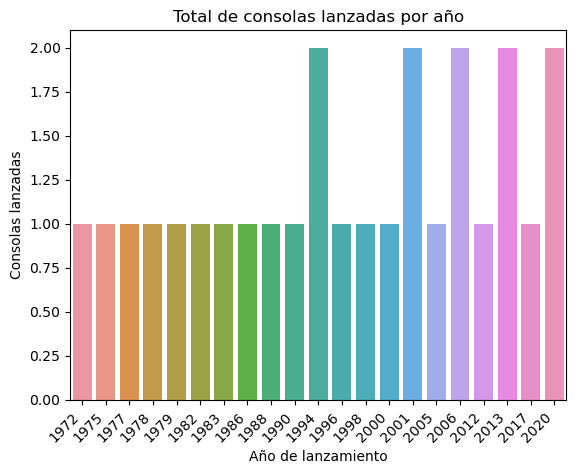

In [15]:
(
  console_df
  .groupby(["released_year"])
  ["console_name"]
  .count()
  .sort_values(ascending=True)
  .reset_index(name="count")
  .pipe(
    lambda df: (
      sns.barplot(
        x=df["released_year"],
        y=df["count"]
      )
      .set(
        title="Total de consolas lanzadas por año",
        xlabel="Año de lanzamiento",
        ylabel="Consolas lanzadas"
      )
    )
  )
)

plt.xticks(rotation=45, ha='right')
plt.show()

El máximo número de consolas lanzadas en un mismo año es de solo 2 en 1994, 2001, 2006, 2013 y 2020.

Pero... **¿Qué consolas se lanzaron en esos años y a que compañía pertenecian?**

In [16]:
# Agrupamos y contamos el numero de consolas lanzadas por año, posteriormente filtramos de aquellas que solo tienen un conteno de 1
released_years_df = (
  console_df
  .groupby(["released_year"])
  ["console_name"]
  .count()
  .reset_index(name="count")
  .query("count > 1") 
  .select_columns("released_year")
)

# filtramos las consolas por cada año que tenga más de 1 consola lanzada. 
(
  console_df[console_df["released_year"].isin(released_years_df["released_year"])]
  .sort_values(by="released_year", ascending=True)
  .select_columns("console_name", "company", "released_year")
)

,console_name,company,released_year
10,PlayStation,Sony,1994
11,Sega Saturn,Sega,1994
15,GameCube,Nintendo,2001
16,Xbox,Microsoft,2001
18,PlayStation 3,Sony,2006
19,Wii,Nintendo,2006
21,PlayStation 4,Sony,2013
22,Xbox One,Microsoft,2013
24,PlayStation 5,Sony,2020
25,Xbox Series,Microsoft,2020


### **4. ¿Mayores competidores en consolas de ultima generación?**

,console_name,company,released_year,units_sold_million_
21,PlayStation 4,Sony,2013,117.0
23,Nintendo Switch,Nintendo,2017,138.0
24,PlayStation 5,Sony,2020,55.0
25,Xbox Series,Microsoft,2020,28.0


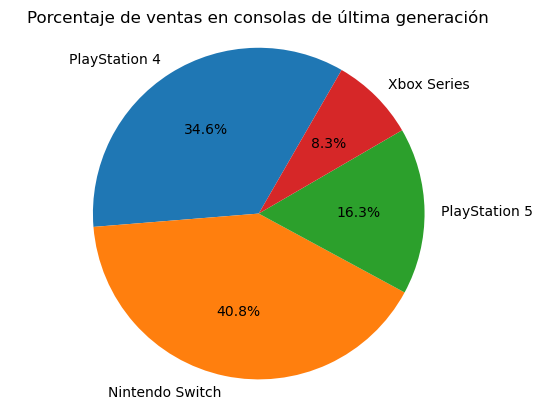

In [17]:
# Nos quedamos solo con las consolas que tiguen en el mercado.
ongoing_consoles_df = console_df[console_df["discontinuation_year"] == "ongoing"]
sales_df = ongoing_consoles_df["units_sold_million_"]

total_sales = sales_df.sum()
sales_proportion = (sales_df / total_sales )

plt.pie(
  sales_proportion,
  labels=ongoing_consoles_df["console_name"],
  autopct='%1.1f%%', startangle=60
)

plt.title("Porcentaje de ventas en consolas de última generación")
plt.axis("equaL")

ongoing_consoles_df.select_columns("console_name", "company","released_year","units_sold_million_" )

La consola de última generación que lleva la batuta en ventas es sin duda la "nintendo switch" con un 40.8% en ventas sobre sus competidores PlayStation 4 y 5 de _Sony_, así como el "Xbox Series" de _Microsfot_.

## Conclusiones

Sin duda tanto _Sony_ como _Nintendo_ son las compañías lideres en producción y ventas de consolas de video juegos, mientras que _Nintendo_ tiene mayor número de consolas lanzadas al mercado (desde 1983) no fue hasta la salida de su consola "Wii" que ésta compañía revasó las 100M de unidades vendidas, 23 años después del nacimiento de su primer consola la "Nintendo Entretainment System". _Sony_ por el contrario con su primer consola la icónica "PlayStation" logró superar los 100M de unidades vendidas y posicionándose como una de las compañías de consolas de video juegos favoritas de los consumidores.